`Chapter 5 -- Equation Solving`

In [1]:
from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

Square systems

In [2]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

A.rank()

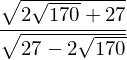

In [3]:
A.condition_number()

In [4]:
sympy.N(_)

In [5]:
A.norm()

In [6]:
A = np.array([[2,3],[5,4]])
b = np.array([4,3])
np.linalg.matrix_rank(A)

2

In [7]:
np.linalg.cond(A)

In [8]:
np.linalg.norm(A)

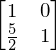

In [9]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

L,U, _ = A.LUdecomposition()
L

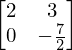

In [10]:
U

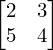

In [11]:
L*U

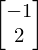

In [12]:
x = A.solve(b); x # same as A.LUsolve(b)

In [13]:
P,L,U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [14]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [15]:
L*U

array([[5. , 0. ],
       [0. , 1.4]])

In [16]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

la.solve(A,b)

ValueError: object arrays are not supported

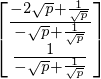

In [17]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1,sympy.sqrt(p)],[1,1/sympy.sqrt(p)]])
b = sympy.Matrix([1,2])
x = A.solve(b)
x

Text(0.5, 0, '$x$')

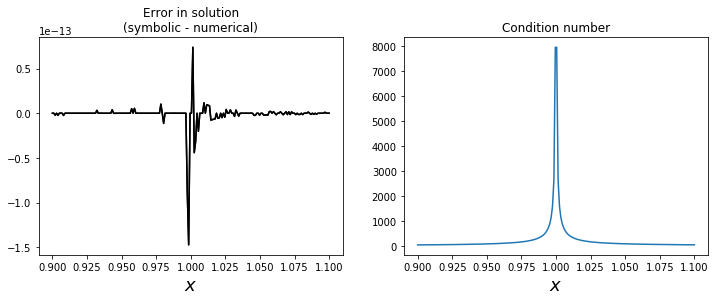

In [18]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1,sympy.sqrt(p)],[1,1/sympy.sqrt(p)]])
b = sympy.Matrix([1,2])

# Solve symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

# Numerical problem specification
AA = lambda p: np.array([[1,np.sqrt(p)],[1,1/np.sqrt(p)]])
bb = np.array([1,2])
x_num_sol = lambda p: np.linalg.solve(AA(p),bb)

# Graph the difference between the symbolic (exact) and numerical results.
fig, axes = plt.subplots(1,2,figsize=(12,4))

p_vec = np.linspace(0.9,1.1,200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p,pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(symbolic - numerical)")
axes[0].set_xlabel(r'$x$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p,pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$x$', fontsize=18)

Rectangular systems

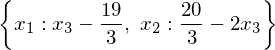

In [19]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1,2,3],[4,5,6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7,8])
sympy.solve(A*x - b, x_vars)

In [20]:
# define true model parameters
x = np.linspace(-1,1,100)
a,b,c = 1,2,3
y_exact = a+b*x+c*x**2
y_exact

array([2.        , 1.92041628, 1.8432813 , 1.76859504, 1.69635751,
       1.62656872, 1.55922865, 1.49433731, 1.4318947 , 1.37190083,
       1.31435568, 1.25925926, 1.20661157, 1.15641261, 1.10866238,
       1.06336088, 1.02050811, 0.98010407, 0.94214876, 0.90664218,
       0.87358433, 0.84297521, 0.81481481, 0.78910315, 0.76584022,
       0.74502602, 0.72666054, 0.7107438 , 0.69727579, 0.6862565 ,
       0.67768595, 0.67156413, 0.66789103, 0.66666667, 0.66789103,
       0.67156413, 0.67768595, 0.6862565 , 0.69727579, 0.7107438 ,
       0.72666054, 0.74502602, 0.76584022, 0.78910315, 0.81481481,
       0.84297521, 0.87358433, 0.90664218, 0.94214876, 0.98010407,
       1.02050811, 1.06336088, 1.10866238, 1.15641261, 1.20661157,
       1.25925926, 1.31435568, 1.37190083, 1.4318947 , 1.49433731,
       1.55922865, 1.62656872, 1.69635751, 1.76859504, 1.8432813 ,
       1.92041628, 2.        , 2.08203245, 2.16651362, 2.25344353,
       2.34282216, 2.43464953, 2.52892562, 2.62565044, 2.72482

In [21]:
# simulate noisy data
m = 100
X = 1-2*np.random.rand(m)
Y = a+b*X+c*X**2+np.random.randn(m)
Y

array([ 3.45820606,  1.24862773,  1.52507217,  0.12042831,  3.15243148,
        1.09656085,  3.0159065 ,  4.72165945,  1.03936366, -0.98956473,
        3.47269617,  1.75995897,  1.40212066,  1.4685938 ,  1.34910841,
        0.93460626,  0.24796924,  5.77726233,  1.03155806,  4.41387441,
        4.72720596,  2.14379989,  6.45903493,  1.95996487,  2.58023182,
        1.52301612,  3.75407429,  3.94253768,  1.26353257, -0.49031351,
        1.08094317,  0.14763026,  2.93499863,  0.72287054,  1.7538984 ,
        0.60563448,  2.75890643,  0.4208833 ,  1.20145749,  2.64926971,
        1.07023525,  1.0686298 ,  2.73539608,  0.08195129,  3.07797548,
        0.69380074,  4.81356268,  0.26058331,  4.31541978,  1.62842105,
        1.65651748,  2.98937034, -0.24235389,  0.94983015,  0.57598407,
        0.11527407,  2.38010797,  3.79580878,  1.50790486,  0.61439886,
        1.5468257 ,  6.29669097,  1.23985832, -0.87704335,  6.17833918,
       -0.46837535,  0.55716348,  1.59659276,  2.16186895,  0.45

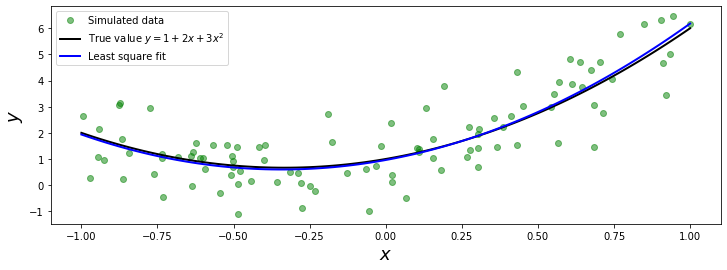

In [22]:
# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, s = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1]*x + sol[2]*x**2
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(X,Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x,y_exact,'k',lw=2,label='True value $y = 1+2x+3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend(loc=2)
plt.show()

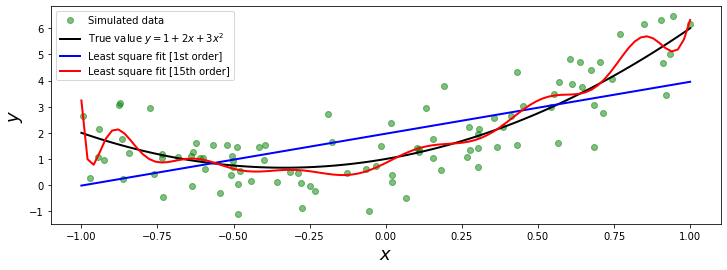

In [23]:
# fit the data to the model using linear least square:
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s*x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s*x**n for n,s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X,Y,'go', alpha=0.5, label='Simulated data')
ax.plot(x,y_exact,'k',lw=2,label='True value $y = 1+2x+3x^2$')
ax.plot(x,y_fit1,'b',lw=2,label='Least square fit [1st order]')
ax.plot(x,y_fit15,'r',lw=2,label='Least square fit [15th order]')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend(loc=2)
plt.show()

Eigenvalue problems

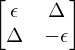

In [24]:
eps, delta = sympy.symbols("epsilon,Delta")
H = sympy.Matrix([[eps,delta],[delta,-eps]])
H

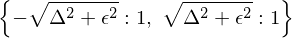

In [25]:
H.eigenvals()

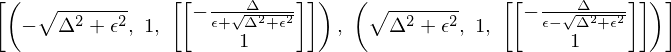

In [26]:
H.eigenvects()

In [27]:
(eval1,_,evec1),(eval2,_,evec2) = H.eigenvects()
sympy.simplify(evec1[0].T*evec2[0])

In [28]:
A = np.array([[1,3,5],[3,5,3],[5,3,9]])
evals,evecs = la.eig(A)
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [29]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [30]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

Nonlinear equations

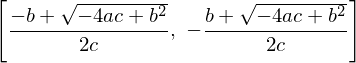

In [31]:
x,a,b,c = sympy.symbols("x,a,b,c")
sympy.solve(a+b*x+c*x**2,x)

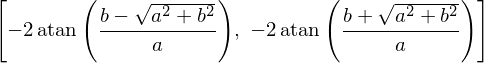

In [32]:
sympy.solve(a*sympy.cos(x)-b*sympy.sin(x),x)

In [33]:
sympy.solve(sympy.sin(x)-x,x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

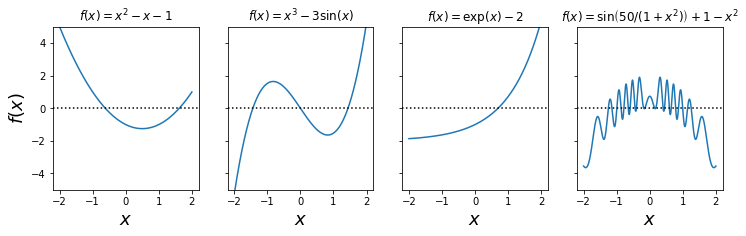

In [34]:
x = np.linspace(-2,2,1000)
# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3*np.sin(x)
f3 = np.exp(x) - 2
f4 = 1-x**2 + np.sin(50/(1+x**2))

# plot each function
fig, axes = plt.subplots(1,4, figsize=(12,3),sharey=True)

for n, f in enumerate([f1,f2,f3,f4]):
    axes[n].plot(x,f,lw=1.5)
    axes[n].axhline(0,ls=':',color='k')
    axes[n].set_ylim(-5,5)
    axes[n].set_xticks([-2,-1,0,1,2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
    
axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',r'$f(x)=\exp(x)-2$',\
          r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

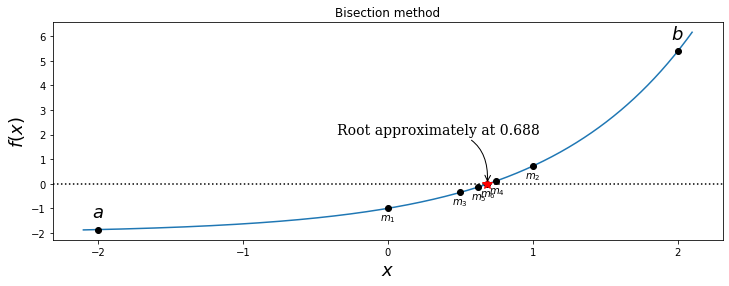

In [35]:
# define a function, desired tolerance and starting interval [a,b]

f = lambda x: np.exp(x)-2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1,2.1,1000)

# graph the function f
fig, ax = plt.subplots(1,1, figsize=(12,4))

ax.plot(x,f(x),lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa+0.5, r'$a$', ha='center', fontsize=18)
ax.text(b, fb+0.5, r'$b$', ha='center', fontsize=18)

n=1
while b-a > tol:
    m = a + (b - a)/2
    fm = f(m)
    
    ax.plot(m, fm, 'ko')
    ax.text(m, fm-0.5, r'$m_%d$' %n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m,fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate('Root approximately at %.3f' %m, fontsize=14, family='serif', xy=(a,fm), \
            xycoords='data', xytext=(-150,+50), textcoords='offset points', \
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=-.5'))
ax.set_title('Bisection method')

plt.show()

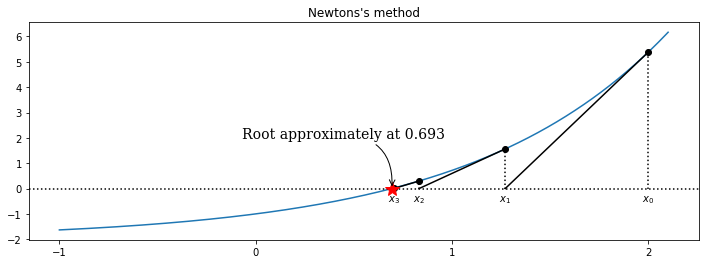

In [37]:
# define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f,s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setup a graph for visualizing the root finding steps
fig,ax = plt.subplots(1,1, figsize=(12,4))

ax.plot(x,f(x))
ax.axhline(0, ls=':', color='k')

# iterate Newton's method until convergence to the desired tolerance has been reached 
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)
    ax.plot([xk,xk], [0,f(xk)], color='k', ls=':')
    ax.plot(xk,f(xk),'ko')
    ax.text(xk,-.5,r'$x_%d$' %n, ha='center')
    ax.plot([xk, xk_new], [f(xk),0], 'k-')
    xk = xk_new
    n += 1
    
ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" %xk,\
           fontsize=14, family="serif",\
           xy=(xk, f(xk)), xycoords='data',\
           xytext=(-150,+50), textcoords='offset points',\
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newtons's method")
ax.set_xticks([-1,0,1,2])

plt.show()